# Cas Kaggle

**Nerea de La Torre Veguillas 1669013**

**Helena Boneu Vidal 1673129**

Hem utilitzat el dataset **Harry Potter Dataset**.

In [7736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as bplt
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix, average_precision_score, precision_recall_curve, auc, roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

Carreguem el **dataset**:

Quan vam observar el datset per primer cop, vem veure que hi havien bastantes característiques dels personatges que no hi eren, per això vem decidir fer una cerca a internet i buscar la informació faltat. Tot i així, no vem poder aconseguir trobar totes les dades necessàries.

In [7737]:
df = 'C:/Users/helen/OneDrive/Documentos/3r Carrera/1r semestre/Aprenentatge Computacional/Kaggle/data/harry-potter-dataset/Characters.csv' #'C:/Users/nerea/OneDrive/Escritorio/cosas uni/3r/AP/kaggle/Characters.csv'

df = pd.read_csv(df, delimiter=';')
df.head(5)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
2,3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
4,5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN


In [7738]:
print("Columnes amb nans:\n")
nan_columns = df.columns[df.isna().sum()>0].tolist()
print (df.loc[:,nan_columns].isna().sum()/len(df)*100)

Columnes amb nans:

Job              5.000000
House           16.428571
Patronus         5.000000
Blood status     5.000000
Hair colour      0.714286
Eye colour      12.142857
Skills           5.000000
Birth            9.285714
Death           70.000000
dtype: float64


Eliminem les files dels **personatges** que **no** tenen **casa**.

In [7739]:
df = df.dropna(subset=['House'])

També veiem que les característiques 'Birth, Death' no són rellevants per a la nostra predicció. Per tant, les podriem eliminar del nostre dataset.

In [7740]:
df = df.drop(columns=['Birth', 'Death'])
print(df.keys())

Index(['Id', 'Name', 'Gender', 'Job', 'House', 'Wand', 'Patronus', 'Species',
       'Blood status', 'Hair colour', 'Eye colour', 'Loyalty', 'Skills'],
      dtype='object')


Mirem les **columnes** que tenen **nans**.

In [7741]:
print("Columnes amb nans:\n")
nan_columns = df.columns[df.isna().sum()>0].tolist()
print (df.loc[:,nan_columns].isna().sum()/len(df)*100)

nan_columns = df.columns[df.isna().sum()>0].tolist() #columnes q falta 1 o més valors al datset
print('NÚMERO DE NANS PER COLUMNA:')
print (df.loc[:,nan_columns].isna().sum()) #numero de nans per columna

Columnes amb nans:

Job              4.273504
Patronus         5.128205
Blood status     2.564103
Eye colour      10.256410
Skills           5.128205
dtype: float64
NÚMERO DE NANS PER COLUMNA:
Job              5
Patronus         6
Blood status     3
Eye colour      12
Skills           6
dtype: int64


Haurem de fer **encoding** per les variables categòriques.
* Eye colour
* Hair colour
* Gender

In [7742]:
from sklearn.preprocessing import LabelEncoder

numeric_features = df.select_dtypes(np.number).keys()
non_numeric = ['Hair colour', 'Gender']
df.loc[:,non_numeric] = df.loc[:,non_numeric].apply(LabelEncoder().fit_transform)
df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills
0,1,Harry James Potter,1,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,2,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...
1,2,Ronald Bilius Weasley,1,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,15,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping
2,3,Hermione Jean Granger,0,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,5,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything
3,4,Albus Percival Wulfric Brian Dumbledore,1,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,20,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...
4,5,Rubeus Hagrid,1,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,Half-Human/Half-Giant,Part-Human (Half-giant),2,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...


In [7743]:
# Definim les columnes no numèriques
non_numeric = ['Eye colour']

# Creem el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder només sobre les files no NaN
for col in non_numeric:
    # Filtrarem les files no nules per aplicar el fit_transform
    non_nan_data = df[col].dropna()  # Elimina els NaN per evitar errors
    
    # Mapejarem les categories de les files no NaN
    df.loc[non_nan_data.index, col] = label_encoder.fit_transform(non_nan_data)

Apliquem un KKN per trobar la característica **Eye colour** dels personatges que no la tenen.

In [7744]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['Eye colour'] = imputer.fit_transform(df[['Eye colour', 'Gender', 'Hair colour']])

df['Eye colour'] = df['Eye colour'].round().astype(int)  # Arrodonir i convertir a enter

# Mostrem el resultat
df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills
0,1,Harry James Potter,1,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...
1,2,Ronald Bilius Weasley,1,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping
2,3,Hermione Jean Granger,0,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything
3,4,Albus Percival Wulfric Brian Dumbledore,1,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...
4,5,Rubeus Hagrid,1,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,Half-Human/Half-Giant,Part-Human (Half-giant),2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...


A la categoria Species, hem borrat els parèntesis explicatius que hi ha a alguns personatges que són Human.

In [7745]:
# Eliminem espai del final
df['Species'] = df['Species'].str.strip()

# Eliminem els parèntesis explicatius de la columna 'Species'
df['Species'] = df['Species'].str.replace(r'\s*\(.*?\)', '', regex=True)

# Verifiquem els resultats
df['Species'].unique()

array(['Human', 'Half-Human/Half-Giant', 'Werewolf', 'Ghost'],
      dtype=object)

A la característica **Blood status** també apliquem un KKN per trobar les que ens falten.

In [7746]:
# Definim les columnes no numèriques
non_numeric = ['Blood status']

# Creem el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder només sobre les files no NaN
for col in non_numeric:
    # Filtrarem les files no nules per aplicar el fit_transform
    non_nan_data = df[col].dropna()  # Elimina els NaN per evitar errors
    
    # Mapejarem les categories de les files no NaN
    df.loc[non_nan_data.index, col] = label_encoder.fit_transform(non_nan_data)

In [7747]:
numeric_features = df.select_dtypes(np.number).keys()
non_numeric = ['Species']
df.loc[:,non_numeric] = df.loc[:,non_numeric].apply(LabelEncoder().fit_transform)

# Imputar amb KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Blood status'] = imputer.fit_transform(df[['Blood status', 'Species']])

# Convertir la columna 'Blood status' de nou a l'original format
# Si 'Blood status' és una variable categòrica, pots convertir els floats a enters
df['Blood status'] = df['Blood status'].round().astype(int)  # Arrodonir i convertir a enter

# Mostrem el resultat
df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills
0,1,Harry James Potter,1,Student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...
1,2,Ronald Bilius Weasley,1,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping
2,3,Hermione Jean Granger,0,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything
3,4,Albus Percival Wulfric Brian Dumbledore,1,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...
4,5,Rubeus Hagrid,1,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...


In [7748]:
print("Columnes amb nans:\n")
nan_columns = df.columns[df.isna().sum()>0].tolist()
print (df.loc[:,nan_columns].isna().sum()/len(df)*100)

nan_columns = df.columns[df.isna().sum()>0].tolist() # columnes que falta 1 o més valors al datset
print('\nNÚMERO DE NANS PER COLUMNA:')
print (df.loc[:,nan_columns].isna().sum()) # número de nans per columna

Columnes amb nans:

Job         4.273504
Patronus    5.128205
Skills      5.128205
dtype: float64

NÚMERO DE NANS PER COLUMNA:
Job         5
Patronus    6
Skills      6
dtype: int64


Característica **Job**

In [7749]:
# Eliminem espai del final
df['Job'] = df['Job'].str.strip()

# Eliminem els parèntesis explicatius de la columna 'Species'
df['Job'] = df['Job'].str.replace(r'\s*\(.*?\)', '', regex=True)

# Verifiquem els resultats
df['Job'].unique()

# Primer, ignorem les files amb NaNs a la columna 'Job' al contar les feines
df['Job_Count'] = df['Job'].apply(lambda x: len(x.split('|')) if pd.notna(x) else 0)

# Filtrem les files on 'Job_Count' es més gran que 1
multiple_jobs = df[df['Job_Count'] > 1]

# Imprimim els personatges que tenen més d'una feina
print("Personatges amb més d'una feina:")
print(multiple_jobs[['Job', 'Job_Count']])

print("\nEl màxim de feines que te algún dels personatges és de",max(multiple_jobs['Job_Count']))

#df.head()

Personatges amb més d'una feina:
                                                  Job  Job_Count
4   Keeper of Keys and Grounds | Professor of Care...          2
16  Student|Prefect|  Personal assistant to Barty ...          3
29  Professor of Transfiguration | Head of Gryffindor          2
36            Professor of Charms | Head of Ravenclaw          2
45           Professor of Potions | Head of Slytherin          2
50  Professor of Defence Against the Dark Arts | D...          2
81  Professor of Herbology | Head of Hufflepuff House          2
94                        Auror  | Minister for Magic          2
98           Head of Auror Office| Minister for Magic          2

El màxim de feines que te algún dels personatges és de 3


Com que hem vist que el màxim de feines és de 3, crearem 3 columnes addicionals separant les feines de cada personatge. Les columnes que crearem seran:
* Job_1 (per la 1ra feina)
* Job_2 (per la 2na feina)
* Job_3 (per la 3ra feina)

In [7750]:
# Separem les feines en 3 columnes
feines_separades = df['Job'].apply(lambda x: x.split('|') if pd.notna(x) else []).apply(pd.Series)

# Canviem el nom de les columnes
feines_separades.columns = [f'Job_{i+1}' for i in range(feines_separades.shape[1])]

# Afegim les columnes al df
df = pd.concat([df, feines_separades], axis=1)

df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Job_Count,Job_1,Job_2,Job_3
0,1,Harry James Potter,1,Student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,1,Student,NaN,NaN
1,2,Ronald Bilius Weasley,1,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1,Student,NaN,NaN
2,3,Hermione Jean Granger,0,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,1,Student,NaN,NaN
3,4,Albus Percival Wulfric Brian Dumbledore,1,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,1,Headmaster,NaN,NaN
4,5,Rubeus Hagrid,1,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,2,Keeper of Keys and Grounds,Professor of Care of Magical Creatures,NaN


A continuació, agruparem les feines de cada personatge en feines més globals. A més a més, els personatges que tinguin més d'una feina, triarem per a aquests la que és repeteix més vegades d'entre els personatges que tenen només una feina.

In [7751]:
# Creem un diccionari de mapeig per agrupar feines similars
feines_similars = {
    'Professor': ['Professor', 'Defence Against the Dark Arts'],
    'House Ghost': ['House Ghost'],
    'Founder': ['Founder'],
    'School Head' : ['Headmaster', 'Headmistress'],
    'Gringotts' : ['Gringotts'],
    'Hogwarts service' : ['Matron', 'Flying Instructor', 'Astronomer', 'keeper of keys'],
    'Magical Government' : ['Magical', 'Muggle Artefacts'],
    'Death eater' : ['unspeakable', 'voldemort', 'executioner'],
    'Barman' : ['barman'],   
    'Quidditch' : ['quidditch'],
    'Head of House' : ['head'],
    'Personal Assistant' : ['Personal assistant']              
}

def agrupar_feina(feina):
    # Ens assegurem que les paraules estiguin en minuscules i sense espais addicionals
    feina = feina.strip().lower()
    
    for categoria, similares in feines_similars.items():
        # Comparem la feina amb les paraules de la llista
        llista = [item.strip().lower() for item in similares]
        paraules_dividides = []
        for paraula in llista:
            paraula_separada = paraula.split(' ')
            paraules_dividides.append(' '.join(paraula_separada))
        for i in paraules_dividides:
             if i in feina:
                return categoria.lower()
    return feina

# Filtrem els personatges que tenen 1, 2 o 3 feines
df_job_1 = df[df['Job_Count'] == 1]
df_job_2 = df[df['Job_Count'] == 2]
df_job_3 = df[df['Job_Count'] == 3]

# Ens guardem també els personatges que no tenen cap feina
df_sense_job = df[df['Job_Count'] == 0]

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_1'
df_job_1['Job_1_Agrupat'] = df_job_1['Job_1'].apply(agrupar_feina)

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_2'
df_job_2['Job_1_Agrupat'] = df_job_2['Job_1'].apply(agrupar_feina)
df_job_2['Job_2_Agrupat'] = df_job_2['Job_2'].apply(agrupar_feina)

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_3'
df_job_3['Job_1_Agrupat'] = df_job_3['Job_1'].apply(agrupar_feina)
df_job_3['Job_2_Agrupat'] = df_job_3['Job_2'].apply(agrupar_feina)
df_job_3['Job_3_Agrupat'] = df_job_3['Job_3'].apply(agrupar_feina)

# Contem quantes vegades és repeteixen les feines de la columna 'Job_1'
feines_repetides_job_1 = df_job_1['Job_1_Agrupat'].value_counts()

# Imprimim les feines i quantes vegeades és repeteixen
print("Feines repetides Job_1:\n")
print(feines_repetides_job_1)

# Concatenem tots els datasets
df_tot = pd.concat([df_sense_job, df_job_1, df_job_2, df_job_3], ignore_index=True, sort=False)

# Ordenem el dataset respecte Id
df_tot = df_tot.sort_values(by='Id')

df_tot.head()

Feines repetides Job_1:

Job_1_Agrupat
student               53
professor              9
auror                  7
death eater            7
magical government     4
house ghost            4
founder                4
hogwarts service       3
school head            2
gringotts              2
housewife              2
dragonologist          1
school governor        1
wandmaker              1
minister for magic     1
barman                 1
quidditch              1
Name: count, dtype: int64


C:\Users\helen\AppData\Local\Temp\ipykernel_9972\531071686.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\531071686.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\531071686.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Job_Count,Job_1,Job_2,Job_3,Job_1_Agrupat,Job_2_Agrupat,Job_3_Agrupat
5,1,Harry James Potter,1,Student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,1,Student,NaN,NaN,student,NaN,NaN
6,2,Ronald Bilius Weasley,1,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1,Student,NaN,NaN,student,NaN,NaN
7,3,Hermione Jean Granger,0,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,1,Student,NaN,NaN,student,NaN,NaN
8,4,Albus Percival Wulfric Brian Dumbledore,1,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,1,Headmaster,NaN,NaN,school head,NaN,NaN
108,5,Rubeus Hagrid,1,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,2,Keeper of Keys and Grounds,Professor of Care of Magical Creatures,NaN,hogwarts service,professor,NaN


Respecte als personatges que tenen més d'una feina, mirarem quina d'aquestes està més repetida i li assignarem aquesta.

In [7752]:
# Creem un diccionari amb els valors de repetició de cada 'Job_1'
dict = df_job_1['Job_1_Agrupat'].value_counts().to_dict()

# Funció per assignar la feina que és repeteix més vegades
def feina_frequent(fila):
    jobs = [fila['Job_1_Agrupat'], fila.get('Job_2_Agrupat'), fila.get('Job_3_Agrupat')]
    jobs = [job for job in jobs if job]  # Eliminem les feines nul·les
    feina_mes_frequent = max(jobs, key=lambda job: dict.get(job, 0))
    return feina_mes_frequent

# Assignem la feina als personatges que només en tenen 1
df_job_1['Job_Final'] = df_job_1['Job_1_Agrupat']

# Assignem la feina més freqüent als personatges amb 2 o 3 feines
df_job_2['Job_Final'] = df_job_2.apply(feina_frequent, axis=1)
df_job_3['Job_Final'] = df_job_3.apply(feina_frequent, axis=1)

# Concatenem tots els datasets (afegim també els personatges que no tenen cap feina)
df_tot = pd.concat([df_sense_job, df_job_1, df_job_2, df_job_3], ignore_index=True, sort=False)

# Ordenem el dataset respecte Id
df_tot = df_tot.sort_values(by='Id')

# Assignem els valors de Job_Final a Job
df_tot['Job'] = df_tot['Job_Final']

# Eliminem les columnes que ja no necessitem
df = df_tot.drop(columns=['Job_1', 'Job_2', 'Job_3', 'Job_1_Agrupat', 'Job_2_Agrupat', 'Job_3_Agrupat', 'Job_Final', 'Job_Count'])

df.head()

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\2209735659.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\2209735659.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\2209735659.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills
5,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...
6,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping
7,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything
8,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...
108,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...


In [7753]:
# Eliminem espai del final
df['Skills'] = df['Skills'].str.strip()

# Eliminem els parèntesis explicatius de la columna 'Skills'
df['Skills'] = df['Skills'].str.replace(r'\s*\(.*?\)', '', regex=True)

# Verifiquem els resultats
df['Skills'].unique()

# Primer, ignorem les files amb NaNs a la columna 'Skills' al contar les feines
df['Skills_Count'] = df['Skills'].apply(
    lambda x: len(x.split('|')) if isinstance(x, str) and '|' in x else 
            (len(x.split(',')) if isinstance(x, str) and ',' in x else 
            1 if isinstance(x, str) else 0)
)

# Filtrem les files on 'Skills_Count' es més gran que 1
multiple_jobs = df[df['Skills_Count'] > 1]

# Imprimim els personatges que tenen més d'una feina
print("Personatges amb més d'una feina:")
print(multiple_jobs[['Skills', 'Skills_Count']])

print("\nEl màxim de Skills que te algún dels personatges és de",max(multiple_jobs['Skills_Count']))


Personatges amb més d'una feina:
                                                Skills  Skills_Count
5    Parseltongue| Defence Against the Dark Arts | ...             3
6                 Wizard chess | Quidditch goalkeeping             2
108  Resistant to stunning spells| above average st...             3
12                               Chaser| Bat-Bogey hex             2
16                                    Animagus| Seeker             2
17                   Animagus| nonverbal magic| Charms             3
116         Intelligent| hard-working| a model student             3
20   Highly skilled curse-breaker for Gringotts Wiz...             3
21   Highly skilled dragon trainer| one-time Gryffi...             2
22                 Quidditch commentary | broadcasting             2
23   Keeper|  Captain of the Gryffindor Quidditch team             2
32                     Household spells| healing magic             2
34   Learned in the theory of Defensive Magic| less...             2
4

In [7754]:
# Separem les feines en 3 columnes
import re

# Dividimos la columna `Skills` usando los separadores `|` y `,`
skills_separades = df['Skills'].apply(
    lambda x: re.split(r'[|,]', x) if pd.notna(x) else []
).apply(pd.Series)

# Canviem el nom de les columnes
skills_separades.columns = [f'Skill_{i+1}' for i in range(skills_separades.shape[1])]

# Afegim les columnes al df
df = pd.concat([df, skills_separades], axis=1)

df.head(100)

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Skills_Count,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6
5,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,3,Parseltongue,Defence Against the Dark Arts,Seeker,NaN,NaN,NaN
6,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,2,Wizard chess,Quidditch goalkeeping,NaN,NaN,NaN,NaN
7,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,1,Almost everything,NaN,NaN,NaN,NaN,NaN
8,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,1,Considered by many to be one of the most power...,NaN,NaN,NaN,NaN,NaN
108,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,3,Resistant to stunning spells,above average strength,crossbowmanship,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,102,Amos Diggory,1,magical government,Hufflepuff,Unknown,Non-corporeal,2,6,5,14,Minister of Magic,Works for the Department for the Regulation an...,1,Works for the Department for the Regulation an...,NaN,NaN,NaN,NaN,NaN
92,105,Fleur Isabelle Delacour,0,gringotts,Beauxbatons Academy of Magic,"9½"", Rosewood, veela hair",Non-corporeal,2,7,21,7,Order of the Phoenix,part Veela and therefore possesses some of the...,1,part Veela and therefore possesses some of the...,NaN,NaN,NaN,NaN,NaN
93,106,Aberforth Dumbledore,1,barman,Gryffindor,Unknown,Goat,2,0,9,2,Order of the Phoenix,"Bartending, caring for Ariana",2,Bartending,caring for Ariana,NaN,NaN,NaN,NaN
94,110,Marlene McKinnon,0,auror,Gryffindor,Unknown,Unknown,2,6,15,5,Original Order of the Phoenix,Auror,1,Auror,NaN,NaN,NaN,NaN,NaN


In [7755]:
# Creem un diccionari de mapeig per agrupar feines similars
skills_similars = {
    'prefect': ['prefect', 'head boy'],
    'Duel': ['skilled duellist', 'duelling', 'duellist', 'combat'],
    'divination': ['divination', 'seer'],
    'Charms': ['charms', 'hex', 'spells', 'transfiguration', 'defensive magic', 'occlumens'],
    'Mail': ['propaganda'],
    'Heal': ['curing', 'medical', 'healing'],
    'Potions': ['potioneer', 'potions'],
    'auror': ['auror'],
    'magical creatures': ['magical creatures', 'giants','nargles', 'Magizoology'],
    'parsel': ['parsel', 'parselmouths'],
    'great wizard': ['powerful', 'great wizard'],
    'dark arts': ['curse', 'dark', 'voldemort', 'punishment', 'betraying', 'undercover', 'manipulation', 'heir of slytherin', 'inferi'],
    'veela': ['veela'],
    'wand': ['wandcraft'],
    'Quidditch' : ['chaser', 'seeker', 'beater', 'keeper', 'quidditch', 'captain', 'flying'],
    'wisdom': ['intelligence', 'everything', 'wisdom', 'model student', 'intelligent', 'skilled', 'revising'],
    'dancer': ['dancer'],
    'no skills': ['less', 'above average'],
    'professor': ['teaching', 'professor'],
    'other' : ['peeves', 'love potion', 'caring'],
    'order': ['order']    
}

def agrupar_skill(skill):
    # Ens assegurem que les paraules estiguin en minuscules i sense espais addicionals
    skill = skill.strip().lower()
    
    for categoria, similares in skills_similars.items():
        # Comparem la skill amb les paraules de la llista
        llista = [item.strip().lower() for item in similares]
        paraules_dividides = []
        for paraula in llista:
            paraula_separada = paraula.split(' ')
            paraules_dividides.append(' '.join(paraula_separada))
        for i in paraules_dividides:
            if i in skill:
                return categoria.lower()
    return skill

# Filtrem els personatges que tenen 1, 2 o 3 feines
df_skill_1 = df[df['Skills_Count'] == 1]
df_skill_2 = df[df['Skills_Count'] == 2]
df_skill_3 = df[df['Skills_Count'] == 3]
df_skill_4 = df[df['Skills_Count'] == 4]
df_skill_5 = df[df['Skills_Count'] == 5]
df_skill_6 = df[df['Skills_Count'] == 6]

# Ens guardem també els personatges que no tenen cap feina
df_sense_skill = df[df['Skills_Count'] == 0]

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_1'
df_skill_1['Skill_1_Agrupat'] = df_skill_1['Skill_1'].apply(agrupar_skill)

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_2'
df_skill_2['Skill_1_Agrupat'] = df_skill_2['Skill_1'].apply(agrupar_skill)
df_skill_2['Skill_2_Agrupat'] = df_skill_2['Skill_2'].apply(agrupar_skill)

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_3'
df_skill_3['Skill_1_Agrupat'] = df_skill_3['Skill_1'].apply(agrupar_skill)
df_skill_3['Skill_2_Agrupat'] = df_skill_3['Skill_2'].apply(agrupar_skill)
df_skill_3['Skill_3_Agrupat'] = df_skill_3['Skill_3'].apply(agrupar_skill)

df_skill_4['Skill_1_Agrupat'] = df_skill_4['Skill_1'].apply(agrupar_skill)
df_skill_4['Skill_2_Agrupat'] = df_skill_4['Skill_2'].apply(agrupar_skill)
df_skill_4['Skill_3_Agrupat'] = df_skill_4['Skill_3'].apply(agrupar_skill)
df_skill_4['Skill_4_Agrupat'] = df_skill_4['Skill_4'].apply(agrupar_skill)

df_skill_5['Skill_1_Agrupat'] = df_skill_5['Skill_1'].apply(agrupar_skill)
df_skill_5['Skill_2_Agrupat'] = df_skill_5['Skill_2'].apply(agrupar_skill)
df_skill_5['Skill_3_Agrupat'] = df_skill_5['Skill_3'].apply(agrupar_skill)
df_skill_5['Skill_4_Agrupat'] = df_skill_5['Skill_4'].apply(agrupar_skill)
df_skill_5['Skill_5_Agrupat'] = df_skill_5['Skill_5'].apply(agrupar_skill)

df_skill_6['Skill_1_Agrupat'] = df_skill_6['Skill_1'].apply(agrupar_skill)
df_skill_6['Skill_2_Agrupat'] = df_skill_6['Skill_2'].apply(agrupar_skill)
df_skill_6['Skill_3_Agrupat'] = df_skill_6['Skill_3'].apply(agrupar_skill)
df_skill_6['Skill_4_Agrupat'] = df_skill_6['Skill_4'].apply(agrupar_skill)
df_skill_6['Skill_5_Agrupat'] = df_skill_6['Skill_5'].apply(agrupar_skill)
df_skill_6['Skill_6_Agrupat'] = df_skill_6['Skill_6'].apply(agrupar_skill)

# Contem quantes vegades és repeteixen les feines de la columna 'Job_1'
skills_repetides_skill_1 = df_skill_1['Skill_1_Agrupat'].value_counts()

# Imprimim les feines i quantes vegeades és repeteixen
print("Feines repetides Job_1:\n")
print(skills_repetides_skill_1)

# Concatenem tots els datasets
df_tot = pd.concat([df_sense_skill, df_skill_1, df_skill_2, df_skill_3, df_skill_4, df_skill_5, df_skill_6], ignore_index=True, sort=False)

# Ordenem el dataset respecte Id
df_tot = df_tot.sort_values(by='Id')

df_tot.head(108)

Feines repetides Job_1:

Skill_1_Agrupat
quidditch             16
duel                   9
charms                 8
dark arts              7
potions                5
prefect                4
magical creatures      4
auror                  4
divination             3
herbology              3
other                  2
great wizard           2
animagus               2
heal                   2
veela                  2
pyrotechnics           1
wisdom                 1
wand                   1
muggle world works     1
photography            1
mail                   1
parsel                 1
dancer                 1
metamorphmagus         1
astronomy              1
Name: count, dtype: int64


C:\Users\helen\AppData\Local\Temp\ipykernel_9972\3865827766.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\3865827766.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\3865827766.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,Skill_3,Skill_4,Skill_5,Skill_6,Skill_1_Agrupat,Skill_2_Agrupat,Skill_3_Agrupat,Skill_4_Agrupat,Skill_5_Agrupat,Skill_6_Agrupat
109,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,...,Seeker,NaN,NaN,NaN,parsel,dark arts,quidditch,NaN,NaN,NaN
89,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,...,NaN,NaN,NaN,NaN,wizard chess,quidditch,NaN,NaN,NaN,NaN
6,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,...,NaN,NaN,NaN,NaN,wisdom,NaN,NaN,NaN,NaN,NaN
7,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,...,NaN,NaN,NaN,NaN,great wizard,NaN,NaN,NaN,NaN,NaN
110,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,...,crossbowmanship,NaN,NaN,NaN,charms,no skills,crossbowmanship,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,117,Madame Olympe Maxime,0,school head,Beauxbatons Academy of Magic,Unknown,Unknown,1,4,5,...,NaN,NaN,NaN,NaN,dancer,NaN,NaN,NaN,NaN,NaN
79,118,Gabrielle Delacour,0,student,Beauxbatons Academy of Magic,Unknown,Unknown,2,7,21,...,NaN,NaN,NaN,NaN,veela,NaN,NaN,NaN,NaN,NaN
80,119,Viktor Krum,1,quidditch,Durmstrang Institute,"10¼"", Hornbeam, dragon heartstring",Unknown,2,6,7,...,NaN,NaN,NaN,NaN,quidditch,NaN,NaN,NaN,NaN,NaN
5,124,Dennis Creevey,1,student,Gryffindor,Unknown,Unknown,2,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7756]:
# Creem un diccionari amb els valors de repetició de cada 'Job_1'
dict = df_skill_1['Skill_1_Agrupat'].value_counts().to_dict()

# Funció per assignar la feina que és repeteix més vegades
def skill_frequent(fila):
    skills = [fila['Skill_1_Agrupat'], fila.get('Skill_2_Agrupat'), fila.get('Skill_3_Agrupat'), fila.get('Skill_4_Agrupat'), fila.get('Skill_5_Agrupat'), fila.get('Skill_6_Agrupat')]
    skills = [skill for skill in skills if skill]  # Eliminem les feines nul·les
    skill_mes_frequent = max(skills, key=lambda skill: dict.get(skill, 0))
    return skill_mes_frequent

# Assignem la feina als personatges que només en tenen 1
df_skill_1['Skill_Final'] = df_skill_1['Skill_1_Agrupat']

# Assignem la feina més freqüent als personatges amb 2 o 3 feines
df_skill_2['Skill_Final'] = df_skill_2.apply(skill_frequent, axis=1)
df_skill_3['Skill_Final'] = df_skill_3.apply(skill_frequent, axis=1)
df_skill_4['Skill_Final'] = df_skill_4.apply(skill_frequent, axis=1)
df_skill_5['Skill_Final'] = df_skill_5.apply(skill_frequent, axis=1)
df_skill_6['Skill_Final'] = df_skill_6.apply(skill_frequent, axis=1)

# Concatenem tots els datasets (afegim també els personatges que no tenen cap feina)
df_tot = pd.concat([df_sense_skill, df_skill_1, df_skill_2, df_skill_3, df_skill_4, df_skill_5, df_skill_6], ignore_index=True, sort=False)

# Ordenem el dataset respecte Id
df_tot = df_tot.sort_values(by='Id')

# Assignem els valors de Job_Final a Job
df_tot['Skills'] = df_tot['Skill_Final']

# Eliminem les columnes que ja no necessitem
df = df_tot.drop(columns=['Skill_1', 'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_1_Agrupat', 'Skill_2_Agrupat', 'Skill_3_Agrupat', 'Skill_4_Agrupat', 'Skill_5_Agrupat', 'Skill_6_Agrupat', 'Skill_Final', 'Skills_Count'])

df.head()

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\3374169850.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\3374169850.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\3374169850.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills
109,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,quidditch
89,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,quidditch
6,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,wisdom
7,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,great wizard
110,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,charms


In [7757]:
print("Columnes amb nans:\n")
nan_columns = df.columns[df.isna().sum()>0].tolist()
print (df.loc[:,nan_columns].isna().sum()/len(df)*100)

nan_columns = df.columns[df.isna().sum()>0].tolist() # columnes que falta 1 o més valors al datset
print('\nNÚMERO DE NANS PER COLUMNA:')
print (df.loc[:,nan_columns].isna().sum()) # número de nans per columna

Columnes amb nans:

Job         4.273504
Patronus    5.128205
Skills      5.128205
dtype: float64

NÚMERO DE NANS PER COLUMNA:
Job         5
Patronus    6
Skills      6
dtype: int64


In [7758]:
# Eliminem espai del final
df['Loyalty'] = df['Loyalty'].str.strip()

# Eliminem els parèntesis explicatius de la columna 'Species'
df['Loyalty'] = df['Loyalty'].str.replace(r'\s*\(.*?\)', '', regex=True)

# Verifiquem els resultats
df['Loyalty'].unique()

# Primer, ignorem les files amb NaNs a la columna 'Job' al contar les feines
df['Loyalty_Count'] = df['Loyalty'].apply(lambda x: len(x.split('|')) if pd.notna(x) else 0)

# Filtrem les files on 'Job_Count' es més gran que 1
multiple_loyalty = df[df['Loyalty_Count'] > 1]

# Imprimim els personatges que tenen més d'una feina
print("Personatges amb més d'una lleialtat:")
print(multiple_loyalty[['Loyalty', 'Loyalty_Count']])

print("\nEl màxim de lleialtat que te algún dels personatges és de",max(multiple_loyalty['Loyalty_Count']))

#df.head()

Personatges amb més d'una lleialtat:
                                               Loyalty  Loyalty_Count
109  Albus Dumbledore | Dumbledore's Army | Order o...              4
89   Dumbledore's Army | Order of the Phoenix | Hog...              3
6    Dumbledore's Army | Order of the Phoenix | Hog...              3
7    Dumbledore's Army | Order of the Phoenix | Hog...              3
110  Albus Dumbledore | Order of the Phoenix | Hogw...              3
8    Dumbledore's Army | Order of the Phoenix | Hog...              3
9    Dumbledore's Army | Order of the Phoenix | Hog...              3
10   Dumbledore's Army | Order of the Phoenix | Hog...              3
90   Dumbledore's Army | Order of the Phoenix | Hog...              3
11   Dumbledore's Army | Hogwarts School of Witchcr...              2
12   Dumbledore's Army | Hogwarts School of Witchcr...              2
15                        Lord Voldemort| Death Eaters              2
112  Order of the Phoenix| Hogwarts School of Witch..

In [7759]:
# Separem les feines en 3 columnes
loyalty_separades = df['Loyalty'].apply(lambda x: x.split('|') if pd.notna(x) else []).apply(pd.Series)

# Canviem el nom de les columnes
loyalty_separades.columns = [f'Loyalty_{i+1}' for i in range(loyalty_separades.shape[1])]

# Afegim les columnes al df
df = pd.concat([df, loyalty_separades], axis=1)

df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Loyalty_Count,Loyalty_1,Loyalty_2,Loyalty_3,Loyalty_4
109,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,4,Albus Dumbledore | Dumbledore's Army | Order o...,quidditch,4,Albus Dumbledore,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry
89,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,1,Dumbledore's Army | Order of the Phoenix | Hog...,quidditch,3,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN
6,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,5,Dumbledore's Army | Order of the Phoenix | Hog...,wisdom,3,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN
7,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,1,Dumbledore's Army | Order of the Phoenix | Hog...,great wizard,3,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN
110,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,0,Albus Dumbledore | Order of the Phoenix | Hogw...,charms,3,Albus Dumbledore,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN


In [7760]:
# Creem un diccionari de mapeig per agrupar feines similars
loyalty_similars = {
    'hogwarts school': ['hogwarts school'],
    'order of the phoenix': ['order'],
    'ministry': ['ministry', 'minister'],
    'lord voldemort': ['lord voldemort', 'inquisitorial', 'death'],
    'other schools': ['beauxbatons', 'durmstrang'],
    'gringotts': ['gringotts'],
    'dumbledore army': ['army']
}

def agrupar_loyalty(loyalty):
    # Ens assegurem que les paraules estiguin en minuscules i sense espais addicionals
    loyalty = loyalty.strip().lower()
    
    for categoria, similares in loyalty_similars.items():
        # Comparem la feina amb les paraules de la llista
        llista = [item.strip().lower() for item in similares]
        paraules_dividides = []
        for paraula in llista:
            paraula_separada = paraula.split(' ')
            paraules_dividides.append(' '.join(paraula_separada))
        for i in paraules_dividides:
             if i in loyalty:
                return categoria.lower()
    return loyalty

# Filtrem els personatges que tenen 1, 2 o 3 feines
df_loyalty_1 = df[df['Loyalty_Count'] == 1]
df_loyalty_2 = df[df['Loyalty_Count'] == 2]
df_loyalty_3 = df[df['Loyalty_Count'] == 3]
df_loyalty_4 = df[df['Loyalty_Count'] == 4]

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_1'
df_loyalty_1['Loyalty_1_Agrupat'] = df_loyalty_1['Loyalty_1'].apply(agrupar_loyalty)

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_2'
df_loyalty_2['Loyalty_1_Agrupat'] = df_loyalty_2['Loyalty_1'].apply(agrupar_loyalty)
df_loyalty_2['Loyalty_2_Agrupat'] = df_loyalty_2['Loyalty_2'].apply(agrupar_loyalty)

# Apliquem la funció per agrupar les feines més similars de la columna 'Job_3'
df_loyalty_3['Loyalty_1_Agrupat'] = df_loyalty_3['Loyalty_1'].apply(agrupar_loyalty)
df_loyalty_3['Loyalty_2_Agrupat'] = df_loyalty_3['Loyalty_2'].apply(agrupar_loyalty)
df_loyalty_3['Loyalty_3_Agrupat'] = df_loyalty_3['Loyalty_3'].apply(agrupar_loyalty)

df_loyalty_4['Loyalty_1_Agrupat'] = df_loyalty_4['Loyalty_1'].apply(agrupar_loyalty)
df_loyalty_4['Loyalty_2_Agrupat'] = df_loyalty_4['Loyalty_2'].apply(agrupar_loyalty)
df_loyalty_4['Loyalty_3_Agrupat'] = df_loyalty_4['Loyalty_3'].apply(agrupar_loyalty)
df_loyalty_4['Loyalty_4_Agrupat'] = df_loyalty_4['Loyalty_4'].apply(agrupar_loyalty)

# Contem quantes vegades és repeteixen les feines de la columna 'Job_1'
loyalty_repetides_loyalty_1 = df_loyalty_1['Loyalty_1_Agrupat'].value_counts()

# Imprimim les feines i quantes vegeades és repeteixen
print("Feines repetides Job_1:\n")
print(loyalty_repetides_loyalty_1)

# Concatenem tots els datasets
df_tot = pd.concat([df_loyalty_1, df_loyalty_2, df_loyalty_3, df_loyalty_4], ignore_index=True, sort=False)

# Ordenem el dataset respecte Id
df_tot = df_tot.sort_values(by='Id')

df_tot.head()

Feines repetides Job_1:

Loyalty_1_Agrupat
hogwarts school         19
order of the phoenix    16
dumbledore army          6
ministry                 5
lord voldemort           4
albus dumbledore         3
other schools            3
family                   2
Name: count, dtype: int64


C:\Users\helen\AppData\Local\Temp\ipykernel_9972\1903295440.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\1903295440.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helen\AppData\Local\Temp\ipykernel_9972\1903295440.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,Skills,Loyalty_Count,Loyalty_1,Loyalty_2,Loyalty_3,Loyalty_4,Loyalty_1_Agrupat,Loyalty_2_Agrupat,Loyalty_3_Agrupat,Loyalty_4_Agrupat
116,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,...,quidditch,4,Albus Dumbledore,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,albus dumbledore,dumbledore army,order of the phoenix,hogwarts school
101,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,...,quidditch,3,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN,dumbledore army,order of the phoenix,hogwarts school,NaN
102,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,...,wisdom,3,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN,dumbledore army,order of the phoenix,hogwarts school,NaN
103,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,...,great wizard,3,Dumbledore's Army,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN,dumbledore army,order of the phoenix,hogwarts school,NaN
104,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,...,charms,3,Albus Dumbledore,Order of the Phoenix,Hogwarts School of Witchcraft and Wizardry,NaN,albus dumbledore,order of the phoenix,hogwarts school,NaN


In [7761]:
# Combina totes les columnes en una única sèrie
totes_les_loyalties = pd.concat([
    df_tot['Loyalty_1_Agrupat'],
    df_tot['Loyalty_2_Agrupat'],
    df_tot['Loyalty_3_Agrupat'],
    df_tot['Loyalty_4_Agrupat']
], ignore_index=True)

# Elimina valors nuls (NaN) per evitar comptar-los
totes_les_loyalties = totes_les_loyalties.dropna()

# Compta els valors únics
valors_diferents_loyalty = totes_les_loyalties.nunique()
print(f"Nombre de valors diferents de loyalty: {valors_diferents_loyalty}")

Nombre de valors diferents de loyalty: 9


In [7762]:
# Combinar totes les columnes Loyalty en una única sèrie i trobar valors únics
columnes_loyalty = [f'Loyalty_{i}_Agrupat' for i in range(1, 5)]
totes_les_loyalties = pd.concat([df_tot[col] for col in columnes_loyalty], ignore_index=True).dropna()
valors_unics_loyalty = totes_les_loyalties.unique()

# Crear una columna per cada valor únic de lleialtat
for valor in valors_unics_loyalty:
    df_tot[valor] = df_tot[columnes_loyalty].apply(lambda row: int(valor in row.values), axis=1)

# Eliminem les columnes que ja no necessitem
df = df_tot.drop(columns=['Loyalty_1', 'Loyalty_2', 'Loyalty_3', 'Loyalty_4', 'Loyalty_1_Agrupat', 'Loyalty_2_Agrupat', 'Loyalty_3_Agrupat', 'Loyalty_4_Agrupat', 'Loyalty_Count', 'Loyalty'])

df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,Skills,albus dumbledore,dumbledore army,order of the phoenix,lord voldemort,hogwarts school,ministry,family,other schools,gringotts
116,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,...,quidditch,1,1,1,0,1,0,0,0,0
101,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,...,quidditch,0,1,1,0,1,0,0,0,0
102,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,...,wisdom,0,1,1,0,1,0,0,0,0
103,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,...,great wizard,0,1,1,0,1,0,0,0,0
104,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,...,charms,1,0,1,0,1,0,0,0,0


In [7763]:
# Seleccionar les columnes per fer la imputació
columnes_predictives = ['Skills', 'albus dumbledore', 'dumbledore army', 'order of the phoenix',
                        'lord voldemort', 'hogwarts school', 'ministry', 'family',
                        'other schools', 'gringotts']

# Filtrar només les columnes necessàries
df_subset = df[columnes_predictives]

numeric_features = df_subset.select_dtypes(np.number).keys()
non_numeric = ['Skills']
df_subset.loc[:,non_numeric] = df_subset.loc[:,non_numeric].apply(LabelEncoder().fit_transform)

# Crear i aplicar el KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Pots ajustar el nombre de veïns (k)
df_imputat = pd.DataFrame(imputer.fit_transform(df_subset), columns=columnes_predictives)

# Tornar a convertir 'skills' en categòrica si cal
df_imputat['Skills'] = df_imputat['Skills'].round().astype('int')  # Arrodonim si és una categoria
df_imputat['Skills'] = df_imputat['Skills'].astype('category')

# Assignar la columna imputada al DataFrame original
df['Skills'] = df_imputat['Skills']

# Verificació
df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,Skills,albus dumbledore,dumbledore army,order of the phoenix,lord voldemort,hogwarts school,ministry,family,other schools,gringotts
116,1,Harry James Potter,1,student,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,...,7,1,1,1,0,1,0,0,0,0
101,2,Ronald Bilius Weasley,1,student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,...,10,0,1,1,0,1,0,0,0,0
102,3,Hermione Jean Granger,0,student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,...,25,0,1,1,0,1,0,0,0,0
103,4,Albus Percival Wulfric Brian Dumbledore,1,school head,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,...,4,0,1,1,0,1,0,0,0,0
104,5,Rubeus Hagrid,1,professor,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,...,22,1,0,1,0,1,0,0,0,0


In [7764]:
# Definim les columnes no numèriques
non_numeric = ['Job']

# Creem el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder només sobre les files no NaN
for col in non_numeric:
    # Filtrarem les files no nules per aplicar el fit_transform
    non_nan_data = df[col].dropna()  # Elimina els NaN per evitar errors
    
    # Mapejarem les categories de les files no NaN
    df.loc[non_nan_data.index, col] = label_encoder.fit_transform(non_nan_data)

In [7765]:
imputer = KNNImputer(n_neighbors=5)
df['Job'] = imputer.fit_transform(df[['Job', 'Skills']])
df['Job'] = df['Job'].round().astype('int')  # Arrodonim si és una categoria

df.head()

c:\Users\helen\anaconda3\envs\spyder-cf\lib\site-packages\IPython\core\displayhook.py:275: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,...,Skills,albus dumbledore,dumbledore army,order of the phoenix,lord voldemort,hogwarts school,ministry,family,other schools,gringotts
116,1,Harry James Potter,1,15,Gryffindor,"11"" Holly phoenix feather",Stag,2,0,2,...,7,1,1,1,0,1,0,0,0,0
101,2,Ronald Bilius Weasley,1,15,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,2,5,15,...,10,0,1,1,0,1,0,0,0,0
102,3,Hermione Jean Granger,0,15,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,2,1,5,...,25,0,1,1,0,1,0,0,0,0
103,4,Albus Percival Wulfric Brian Dumbledore,1,14,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,2,0,20,...,4,0,1,1,0,1,0,0,0,0
104,5,Rubeus Hagrid,1,11,Gryffindor,"16"" Oak unknown core",NaN,1,4,2,...,22,1,0,1,0,1,0,0,0,0


In [7766]:
print("Columnes amb nans:\n")
nan_columns = df.columns[df.isna().sum()>0].tolist()
print (df.loc[:,nan_columns].isna().sum()/len(df)*100)

nan_columns = df.columns[df.isna().sum()>0].tolist() # columnes que falta 1 o més valors al datset
print('\nNÚMERO DE NANS PER COLUMNA:')
print (df.loc[:,nan_columns].isna().sum()) # número de nans per columna

Columnes amb nans:

Patronus    5.128205
dtype: float64

NÚMERO DE NANS PER COLUMNA:
Patronus    6
dtype: int64


Eliminem les característiques de Wand i Patronus, ja que no ens serà útil per la nostra predicció. Ja que molts valors són desconeguts i els coneguts, la majoria d'ells són valors únics. A més, també eliminem les columnes de Id i Name, ja que no ens aporten informació rellevant.

In [7767]:
# Eliminem les columnes que ja no necessitem
df = df.drop(columns=['Name', 'Wand', 'Patronus']) #'Id'

df.head()

,Id,Gender,Job,House,Species,Blood status,Hair colour,Eye colour,Skills,albus dumbledore,dumbledore army,order of the phoenix,lord voldemort,hogwarts school,ministry,family,other schools,gringotts
116,1,1,15,Gryffindor,2,0,2,4,7,1,1,1,0,1,0,0,0,0
101,2,1,15,Gryffindor,2,5,15,1,10,0,1,1,0,1,0,0,0,0
102,3,0,15,Gryffindor,2,1,5,5,25,0,1,1,0,1,0,0,0,0
103,4,1,14,Gryffindor,2,0,20,1,4,0,1,1,0,1,0,0,0,0
104,5,1,11,Gryffindor,1,4,2,0,22,1,0,1,0,1,0,0,0,0


# GRÀFICS

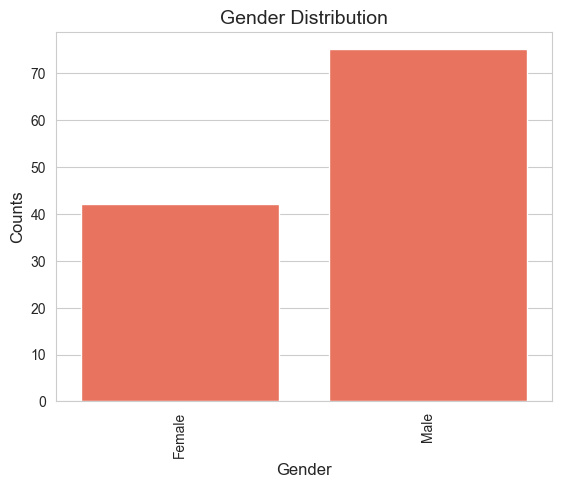

In [7768]:
# Configuració d'estil de gràfic
sns.set_style('whitegrid')

# Creació del gràfic de countplot per 'Blood status'
sns.countplot(x='Gender', data=df, color='#FF6347')

# Afegir el títol i les etiquetes
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Si tens categories en lloc de números, per exemple, 'Pureblood', 'Muggle-born', etc.
# Suposant que 'Blood status' és una columna de tipus categòric amb etiquetes textuals
plt.xticks([0, 1], ['Female', 'Male'], rotation=90)

# Mostrar el gràfic
plt.show()

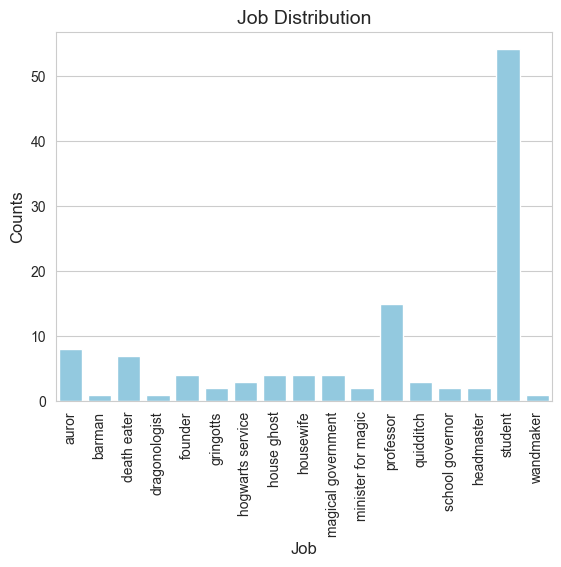

In [7769]:
# Configuració d'estil de gràfic
sns.set_style('whitegrid')

# Creació del gràfic de countplot per 'Blood status'
sns.countplot(x='Job', data=df, color='#87CEEB')

# Afegir el títol i les etiquetes
plt.title('Job Distribution', fontsize=14)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Si tens categories en lloc de números, per exemple, 'Pureblood', 'Muggle-born', etc.
# Suposant que 'Blood status' és una columna de tipus categòric amb etiquetes textuals
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], ['auror', 'barman', 'death eater', 'dragonologist', 'founder', 'gringotts', 'hogwarts service', 'house ghost', 'housewife', 'magical government', 'minister for magic', 'professor', 'quidditch', 'school governor', 'headmaster', 'student', 'wandmaker'], rotation=90)

# Mostrar el gràfic
plt.show()

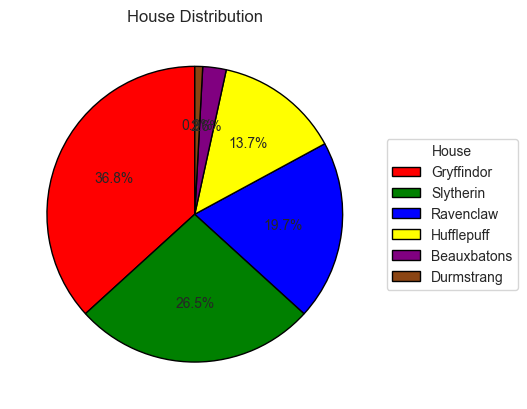

In [7770]:
import matplotlib.pyplot as plt

# Comptem quants hi ha a cada House
survival_counts = df['House'].value_counts()

colors = ['#FF0000', '#008000', '#0000FF', '#FFFF00', '#800080', '#8B4513']

# Crear el gràfic de pastís
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(survival_counts, colors=colors,
                                  autopct='%1.1f%%', startangle=90, 
                                  wedgeprops={'edgecolor': 'black'})  # afegim una mica de separació entre les vores

# Afegir separació a les etiquetes
for text in texts:
    text.set_fontsize(12)  # Canviem la mida de la font per les etiquetes
    text.set_horizontalalignment('center')  # Centrem les etiquetes

# Ajustar la distància de les etiquetes per evitar el solapament
ax.legend(wedges, ['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff', 'Beauxbatons', 'Durmstrang'], 
          title="House", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Títol
plt.title('House Distribution')

# Mostrar el gràfic
plt.show()

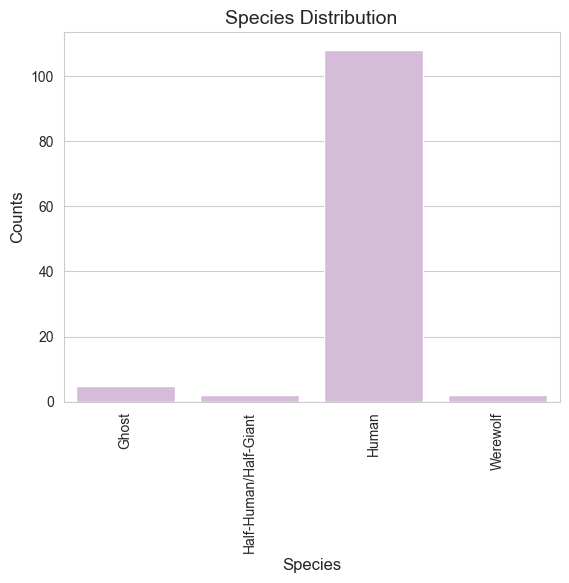

In [7771]:
# Configuració d'estil de gràfic
sns.set_style('whitegrid')

# Creació del gràfic de countplot per 'Blood status'
sns.countplot(x='Species', data=df, color='#D8B7DD')

# Afegir el títol i les etiquetes
plt.title('Species Distribution', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Si tens categories en lloc de números, per exemple, 'Pureblood', 'Muggle-born', etc.
# Suposant que 'Blood status' és una columna de tipus categòric amb etiquetes textuals
plt.xticks([0, 1, 2, 3,], ['Ghost', 'Half-Human/Half-Giant', 'Human', 'Werewolf'], rotation=90)

# Mostrar el gràfic
plt.show()

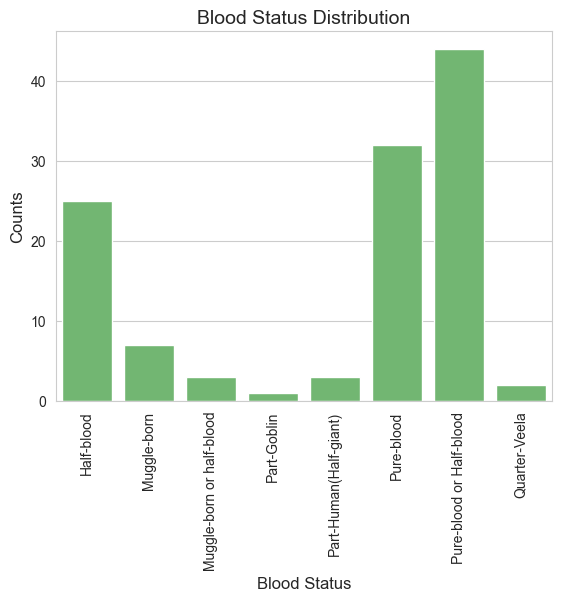

In [7772]:
# Configuració d'estil de gràfic
sns.set_style('whitegrid')

# Creació del gràfic de countplot per 'Blood status'
sns.countplot(x='Blood status', data=df, color='#66C266')

# Afegir el títol i les etiquetes
plt.title('Blood Status Distribution', fontsize=14)
plt.xlabel('Blood Status', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Si tens categories en lloc de números, per exemple, 'Pureblood', 'Muggle-born', etc.
# Suposant que 'Blood status' és una columna de tipus categòric amb etiquetes textuals
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['Half-blood', 'Muggle-born', 'Muggle-born or half-blood', 'Part-Goblin', 'Part-Human(Half-giant)', 'Pure-blood', 'Pure-blood or Half-blood', 'Quarter-Veela'], rotation=90)

# Mostrar el gràfic
plt.show()

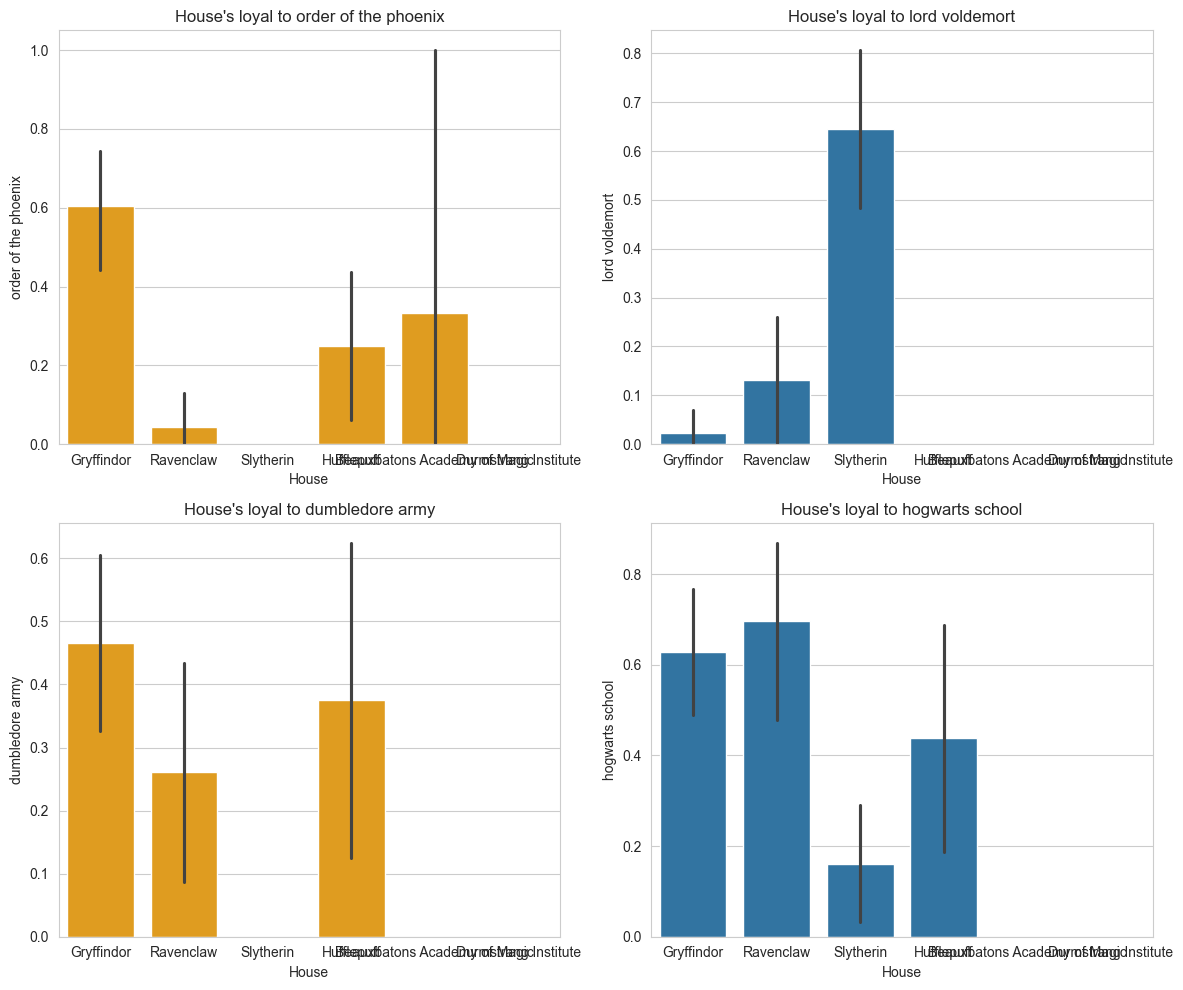

In [7773]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x="House", y="order of the phoenix", data=df, ax=axes[0,0], color='#FFA500')
axes[0,0].set_title("House\'s loyal to order of the phoenix")

sns.barplot(x="House", y="lord voldemort", data=df, ax=axes[0,1])
axes[0,1].set_title('House\'s loyal to lord voldemort')

sns.barplot(x="House", y="dumbledore army", data=df, ax=axes[1,0], color='#FFA500')
axes[1,0].set_title("House\'s loyal to dumbledore army")

sns.barplot(x="House", y="hogwarts school", data=df, ax=axes[1,1])
axes[1,1].set_title('House\'s loyal to hogwarts school')

plt.tight_layout()
plt.show()

Transformem la caracterísitca House a numèrica

In [7774]:
numeric_features = df.select_dtypes(np.number).keys()
non_numeric = ['House']
df.loc[:,non_numeric] = df.loc[:,non_numeric].apply(LabelEncoder().fit_transform)
df.head()

,Id,Gender,Job,House,Species,Blood status,Hair colour,Eye colour,Skills,albus dumbledore,dumbledore army,order of the phoenix,lord voldemort,hogwarts school,ministry,family,other schools,gringotts
116,1,1,15,2,2,0,2,4,7,1,1,1,0,1,0,0,0,0
101,2,1,15,2,2,5,15,1,10,0,1,1,0,1,0,0,0,0
102,3,0,15,2,2,1,5,5,25,0,1,1,0,1,0,0,0,0
103,4,1,14,2,2,0,20,1,4,0,1,1,0,1,0,0,0,0
104,5,1,11,2,1,4,2,0,22,1,0,1,0,1,0,0,0,0


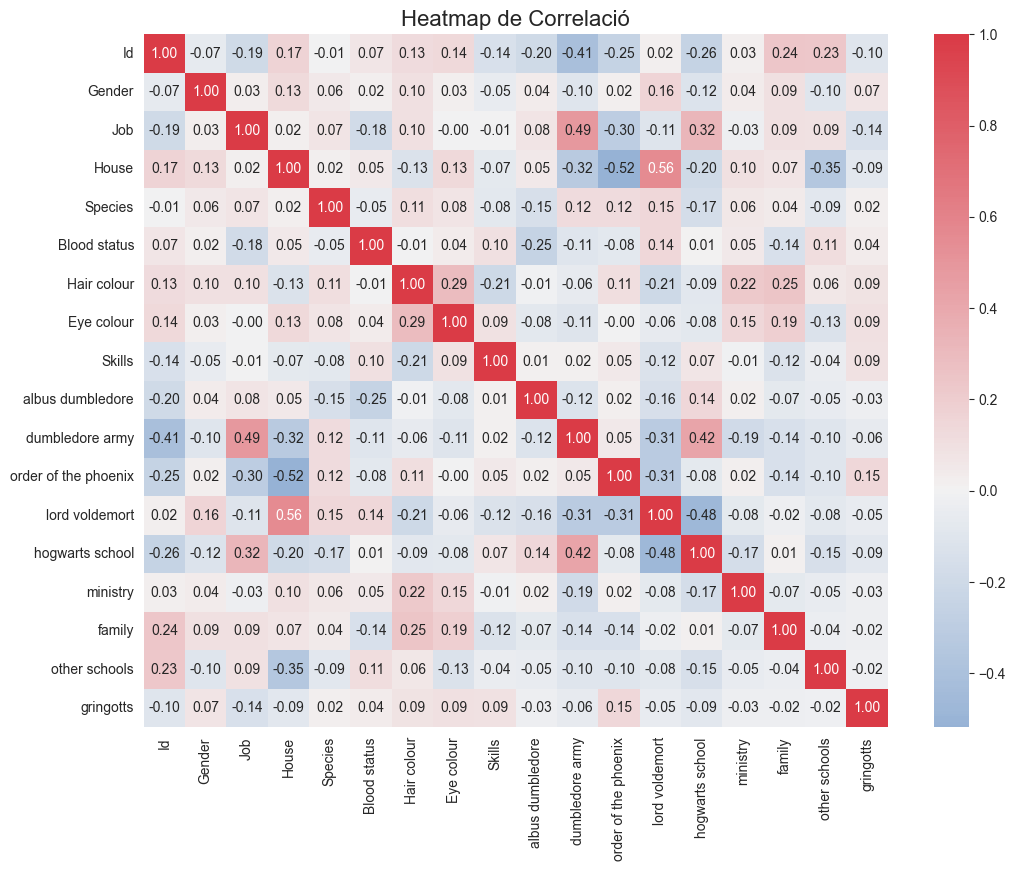

In [7775]:
# Estil de visualització
sns.set_style('whitegrid')

plt.figure(figsize=(12, 9))

palette = sns.diverging_palette(250, 10, as_cmap=True)

# Creació del heatmap
sns.heatmap(df.corr(), cmap=palette, annot=True, fmt=".2f", center=0)

plt.title('Heatmap de Correlació', fontsize=16)

plt.show()

# NORMALITZACIÓ

**Normalitzem** les dades. En concret, els atributs **Job**, **Hair colour**, **Eye colour** i **Skills**.

In [7776]:
from sklearn.preprocessing import StandardScaler

numerical_columns=['Job', 'Species', 'Blood status', 'Hair colour', 'Eye colour', 'Skills']
sc = StandardScaler()
train_norm=sc.fit_transform(df.loc[:,numerical_columns])

df[numerical_columns]=train_norm
df.head()

,Id,Gender,Job,House,Species,Blood status,Hair colour,Eye colour,Skills,albus dumbledore,dumbledore army,order of the phoenix,lord voldemort,hogwarts school,ministry,family,other schools,gringotts
116,1,1,0.827423,2,0.192166,-1.626054,-0.925617,-0.393022,-0.753513,1,1,1,0,1,0,0,0,0
101,2,1,0.827423,2,0.192166,0.415237,0.924400,-1.096851,-0.379949,0,1,1,0,1,0,0,0,0
102,3,0,0.827423,2,0.192166,-1.217796,-0.498690,-0.158412,1.487869,0,1,1,0,1,0,0,0,0
103,4,1,0.632245,2,0.192166,-1.626054,1.635946,-1.096851,-1.127077,0,1,1,0,1,0,0,0,0
104,5,1,0.046709,2,-2.056172,0.006979,-0.925617,-1.331461,1.114305,1,0,1,0,1,0,0,0,0


# PREDICCIÓ

In [7777]:
# Entrenament d'una regressió logística
X = df.drop('House', axis=1)
y = df['House']

model = LogisticRegression(max_iter=200) 
model.fit(X, y)

y_pred = model.predict(X)

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
target = 'House'
attributes = [k for k in df.keys() if k!= target]
X = df[attributes]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

model = LogisticRegression(fit_intercept=True)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy train: {accuracy_train}')
print(f'Accuracy test: {accuracy_test}')

Accuracy train: 0.7096774193548387
Accuracy test: 0.5833333333333334


In [ ]:
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f'F1 Score (Train): {f1_train}')
print(f'F1 Score (Test): {f1_test}')

F1 Score (Train): 0.686643448288535
F1 Score (Test): 0.5154040404040404
